In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [2]:
df_id = pd.read_csv('olist_customers_dataset.csv')
df_id.head()
# таблица с уникальными идентификаторами пользователей

# customer_id — позаказный идентификатор пользователя

# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

# customer_zip_code_prefix —  почтовый индекс пользователя

# customer_city —  город доставки пользователя

# customer_state —  штат доставки пользователя

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_order = pd.read_csv('olist_orders_dataset.csv')
df_order.head()
#  таблица заказов
#     order_id —  уникальный идентификатор заказа (номер чека)

#     customer_id —  позаказный идентификатор пользователя

#     order_status —  статус заказа

#     order_purchase_timestamp —  время создания заказа

#     order_approved_at —  время подтверждения оплаты заказа

#     order_delivered_carrier_date —  время передачи заказа в логистическую службу

#     order_delivered_customer_date —  время доставки заказа

#     order_estimated_delivery_date —  обещанная дата доставки
# Уникальные статусы заказов в таблице olist_orders_dataset:

# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт

# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_items.head()
# товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)

# order_item_id —  идентификатор товара внутри одного заказа

# product_id —  ид товара (аналог штрихкода)

# seller_id — ид производителя товара

# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

# price —  цена за единицу товара

# freight_value —  вес товара

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 
# Для ответа на этот вопрос изучим df_order, где присутствует ид пользователя, а также статус заказа.
# Для начала предположим, что покупка - значит, что заказ доставлен order_status == delivered.

In [6]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
df_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
df_id.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
df_order.shape

(99441, 8)

In [11]:
df_order_new = df_order.dropna()

In [12]:
df_order_new.shape

(96461, 8)

In [13]:
# Осуществили проверку на пропущенные значение и нулевые значения и уберем их из датафрейма df_order,
#  остальные df - ок

In [14]:
df_order_delivered = df_order_new.query("order_status == 'delivered'")\
                                 .groupby(['customer_id'], as_index = False)\
                                 .agg({'order_status' : 'count'})\
                                 .sort_values('order_status')


In [15]:
df_order_delivered


,customer_id,order_status
0,00012a2ce6f8dcda20d059ce98491703,1
64307,aa601b3c45980c0918042d5ca7a25054,1
64306,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1
64305,aa5f87b79875f43b90b310decb62356e,1
64304,aa5f5931b8901ae1ca4b8302f9b94c02,1
...,...,...
32147,5584b1ace8b18cc156ce51b989fd2958,1
32146,558499c2027ec01d530fb975ce2e5b2f,1
32145,55846a9bb9076de56da44e430349ad1a,1
32154,5587073a673239e340006c2ee9e215d2,1


In [16]:
# Напрашивается вывод, что почти все клиенты(кроме 5-ти), как минимум совершили одну покупку 
# 96461 размер исходного датафрейма(после очистки его от пропущенных значений) 96455 размер получившегося датафрейма, 
# что очень странно, возможно существует какая-то связь между customer_unique_id и customer_id, 
# где нескольким пользователям присваивается одинаковый customer_id (по ошибке),
# для того, чтобы это проверить, склеим два датафрейма по customer_id и поиследуем.

In [17]:
df_id_plus_df_order = df_id.merge(df_order_new, on = 'customer_id')
df_id_plus_df_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [18]:
df_id_plus_df_order.shape
#  проверяем что не изменился размер df

(96461, 12)

In [19]:
df_id_plus_df_order_1 = df_id_plus_df_order\
                             .query("order_status == 'delivered'")\
                             .groupby(['customer_unique_id'], as_index = False)\
                             .agg({'order_status' : 'count'})\
                             .sort_values('order_status',ascending = False)\
                             .rename(columns = {'order_status' : 'number_of_orders'})\
                             .query("number_of_orders == '1'")
df_id_plus_df_order_1

,customer_unique_id,number_of_orders
63773,aea40de76143f4303f9df454e32e3ec1,1
63114,ace243696008d0e273f2c47c8d7672cf,1
62281,aaa1c67c77562ad0d99806a54088fc9e,1
62280,aaa1984b0934e3e6ab93de660339fb6a,1
62320,aaba095fa2a2258b9deca8d73264320e,1
...,...,...
31557,5657dfebff5868c4dc7e8355fea865c4,1
31556,5657596addb4d7b07b32cd330614bdf8,1
31555,5656eb169546146caeab56c3ffc3d268,1
31554,5656a8fabc8629ff96b2bc14f8c09a27,1


In [20]:
# После подсчета уникальных customer_unique_id, количество уникальных customer_unique_id уменьшилось,
# а значит в соответсвии customer_unique_id и customer_id, присутствует какая- то аномалия, 
# попробуем разобраться.
# Предположти произошла ошибка и УНИКАЛЬНЫМ customer_unique_id, были присвоены ОДИНАКОВЫЕ customer_id


In [264]:
df_id_plus_df_order.shape

(96461, 12)

In [22]:
df_id_plus_df_order.customer_unique_id.nunique() - df_id_plus_df_order.customer_id.nunique()


-3119

In [23]:
df_id_plus_df_order.query("order_status == 'delivered'").customer_unique_id.nunique()
# Количество уникальных customer_unique_id с статусом delivered

93336

In [24]:
df_id_plus_df_order.query("order_status == 'delivered'").customer_id.nunique()
# Количество уникальных customer_id с статусом delivered

96455

In [25]:
# Количество customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта) 
# - (по заданию) меньше, чем колиечство показанных customer_id, это значит, 
# что произошла ошибка присвоения УНИКАЛЬНОГО customer_id, нескольким РАЗЛИЧНЫМ customer_unique_id,
# соответсвует одинаковый customer_id - такого быть не должно.

In [26]:
# Можно сделать вывод, что присвоение customer_id было сделано не совсем корректно, 
# для исключения ошибки следует использовать customer_unique_id — 
# уникальный идентификатор пользователя  (аналог номера паспорта).

# Например при мерже двух датафреймом olist_orders_dataset.csv и  
# olist_order_items_dataset.csv по order_id мы получим некорректные данные по customer_id, поэтому лучше
# в качестве индификатора пользоваться customer_unique_id, потребуется дополнительный мерж с таблицей 
# olist_customers_datase.csv.
 
# Теперь подумаем, так ли действительно
# много (всё еще клиентов) от общего числа совершили заказы.
# Возможно, сущесвтует постоплатная система заказов, что не очень хорошо для магазина,
# Клиент - товар получил, а оплата, за него не поступила.
# Следует сравнить количество доставленных заказов и оплаченных, если эти данные сильно разлчаются,
# необходимо исключить возможность доставки неоплаченных заказов - это большие издержки для магазина.

In [27]:
df_id_plus_df_order.query("order_status == 'canceled'").shape
# количество отмененных заказов подозрительно мало

(6, 12)

In [28]:
df_id_plus_df_order.query("order_approved_at  !=''").shape
# Количество заказов, где присутствует время подтверждения оплаты заказа


(96461, 12)

In [29]:
df_order.isna().sum()
#  посмотрим ещё раз на датафрейм с пропущенными значениями, 
# order_approved_at             160 неподвержденных оплат
# order_delivered_carrier_date  1783 -время передачи заказа в логистическую службу(не было передано)
# order_delivered_customer_date 2965 - нет времени доставки заказа (не доставлено)
# Возможно это текущие заказы и они в работе, посмотрим за какой промежуток времени 
# встречаются пропуски.

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
df_order.sort_values('order_approved_at')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
64058,1ff217aa612f6cd7c4255c9bfe931c8b,b3a9bf200375f53cc5c6991919c356fd,delivered,2016-10-04 09:16:33,2016-10-04 09:43:32,2016-10-21 16:33:45,2016-10-24 16:33:45,2016-11-24 00:00:00
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
6747,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23 00:00:00
67037,ed8c7b1b3eb256c70ce0c74231e1da88,da0ba2a9935bca5b4610b0e3bca9d3b4,delivered,2016-10-04 09:59:03,2016-10-04 10:25:46,2016-11-11 15:29:14,2016-11-18 08:51:07,2016-11-24 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [31]:
df_order['order_delivered_customer_date_status'] = df_order.order_delivered_customer_date.isna()
df_order.head()
# Создаём колонку в датасете с пропусками, маркер - Есть пропуск True, или нет пропуска False. В
# колонке (order_delivered_customer_date_status —  время доставки заказа) по логике 
# не должно быть NaN, если заказ доставлен, то он должен был отпилинговаться по времени

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,False


In [32]:
df_eror = df_order.query("order_delivered_customer_date_status == True")
# отбираем, только те значения в которых есть пропуски.

In [33]:
df_eror.order_purchase_timestamp = pd.to_datetime(df_eror.order_purchase_timestamp)
df_eror.head()
# Приводим колонку order_purchase_timestamp —  время создания заказа к формате даты

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,True
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,True
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00,True
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00,True
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00,True


(array([736238., 736330., 736420., 736511., 736603., 736695., 736785.,
        736876., 736968.]),
 <a list of 9 Text major ticklabel objects>)

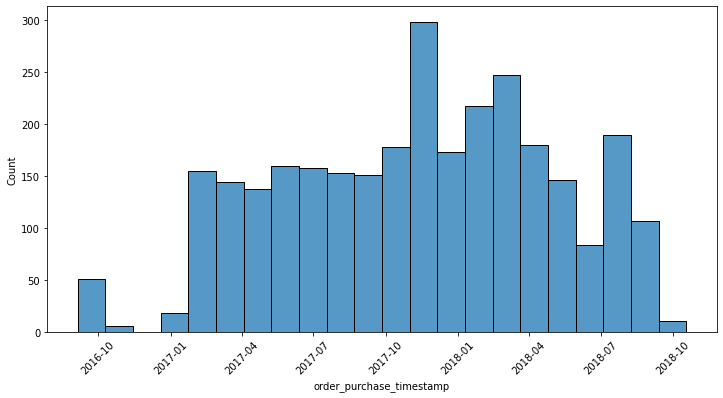

In [34]:
plt.subplots(figsize=(12, 6))
sns.histplot(data=df_eror, x='order_purchase_timestamp', kde=False)
plt.xticks(rotation=45)
# Строим график распределения пропусков по датам, и видим, что начиная с 2016 года, 
# присутсвуют пропуски, отсюда можно сделать вывод, что эти заказы вряд ли в работе, 
# а скорее свего ошибка, которая тянется с 2016 года.


In [35]:
# Возращаемся к датафрейму без пропусков df_id_plus_df_order, где число заказов = 1

In [36]:
df_id_plus_df_order_1.customer_unique_id.nunique()

90536

In [37]:
# 90536 Уникальных пользователей сделали заказ 1 раз
# Что было сделано для такого вывода:
#     1. Гипотеза, о том, что не каждому УНИКАЛЬНОМУ customer_unique_id, 
#     был присвоен customer_id доказана.
#     2. Гипотеза, о том, что слишком много было доставлено, но не оплачено - не подтвердилась, 
#     df_id_plus_df_order.query("order_approved_at  !=''").shape действительно имеет большой размер, что
#     соответсвует, тому, что заказ был оплачен и транзакция прошла.
#     3.Гипотеза, о том, что часть заказов не пилингуется(нет времени доставки заказа пользователю) 
#     и что дальше с ними происходит не совсем ясно, если ещё совсем новые заказы, могут быть 
#     действительно в статусе:
#                             (created —  создан
#                             approved —  подтверждён
#                             invoiced —  выставлен счёт
#                             processing —  в процессе сборки заказа
#                             shipped —  отгружен со склада)
#     и могут быть доставлены, если датафрейм создавался на конец 2018 года, то заказы,
#     которые создавались в 2016 году не получили время - доставки до пользователя, скорее всего 
#     canceled.
#     Таким образом гипотеза 3 - подтверждена.
#     4. По соотношению всех заказов к заказам доставленным и оплаченным, можно сказать, что 
#     датафрейм скорее всего по "успешным" заказам, которые были оплачены и отгружены клиенту.
#     5. Предположение, что работать с неочищенным датафреймом - нельзя - ошибочно, в нём присутствуют
#     свежие заказы, в работе, не только старые(с 2016 г.)
#     Необходимо каждый раз задумыываться, какие заказы нам нужны в выборке в зависимости от задания.
#     Вывод:
#         Необходимо разобраться, почему подвисают заказы и они не попадают в категорию Canceled.
#         Вести KPI ответсвенному менеджеру по закрытию заказов, сейчас "шум" не существенный, но в
#         дальнейшем при накопление в данном датафрейме этих заказов может привести к заблуждению 
#         акционеров компании и неправильному планированию бюджета.
    

In [38]:
# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам 
# (вывести детализацию по причинам)? (10 баллов)


In [39]:
# Предположим, что не доставляется заказ это означает, что отсутствует время доставки заказа 
# order_delivered_customer_date, ранее был введен маркер, доставлен заказ или нет, воспользуемся им
# чтобы отфильтровать датафрейм и отобразить заказы, которые не были доставлены.


In [40]:
df_no_delivered = df_order.query("order_delivered_customer_date_status ==True")
df_no_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,True
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,True
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00,True
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00,True
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00,True


In [41]:
# # для дальнейшей работы приведу все даты к формату Date, чтобы было проще работать с ними.
# df_no_delivered.order_purchase_timestamp = pd.to_datetime(df_no_delivered.order_purchase_timestamp)
# df_no_delivered.order_approved_at = pd.to_datetime(df_no_delivered.order_approved_at)
# df_no_delivered.order_delivered_carrier_date = pd.to_datetime(df_no_delivered.order_delivered_carrier_date)
# df_no_delivered.order_delivered_customer_date = pd.to_datetime(df_no_delivered.order_delivered_customer_date)
# df_no_delivered.order_estimated_delivery_date = pd.to_datetime(df_no_delivered.order_estimated_delivery_date)

In [42]:
df_no_delivered.dtypes

order_id                                object
customer_id                             object
order_status                            object
order_purchase_timestamp                object
order_approved_at                       object
order_delivered_carrier_date            object
order_delivered_customer_date           object
order_estimated_delivery_date           object
order_delivered_customer_date_status      bool
dtype: object

In [43]:
# Чтобы посчитать среднее количество заказов которое не доставляется в месяц, 
# возьмём общее количество заказов и разделим на количество месяцев, которые у нас учавствуют в df
# для этого выделим из даты создания заказа месяц и год.

In [44]:
df_no_delivered['order_purchase_timestamp'] = df_no_delivered['order_purchase_timestamp'].astype(str)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_no_delivered['Year_and_month_creation'] = df_no_delivered['order_purchase_timestamp'].str[:7]

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df_no_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,Year_and_month_creation
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,True,2017-04
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,True,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00,True,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00,True,2017-09
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00,True,2018-01


In [47]:
df_no_delivere_per_month = df_no_delivered.groupby(['Year_and_month_creation'], as_index = False)\
                                          .agg({'order_id':'count'})\
                                          .rename(columns = {'order_id':'quantity'})
df_no_delivere_per_month.quantity.head()

0      3
1     54
2     50
3    127
4    136
Name: quantity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

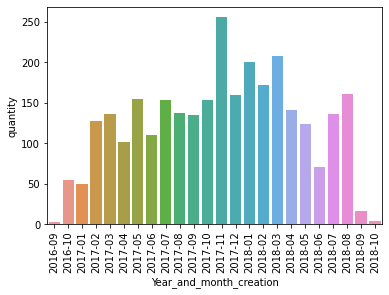

In [48]:
# построим распределение на барплоте для наглядности, сколько заказов не доставляются в каждый месяц
sns.barplot(data = df_no_delivere_per_month, x = 'Year_and_month_creation', y = 'quantity')
plt.xticks(rotation = 90)

In [49]:
df_no_delivere_per_month.quantity.describe()

count     24.000000
mean     123.541667
std       63.738582
min        3.000000
25%       93.500000
50%      136.000000
75%      156.250000
max      256.000000
Name: quantity, dtype: float64

In [50]:
# Cреднее количество заказов разумно округлить до целого.
# Итого 124 заказа в среднем в месяц не доставляется без разбивки на причины, 
# теперь исследуем причину, по которым заказы не доставляют и найдём среднее

In [51]:
df_no_delivere_per_month_causes = df_no_delivered.groupby(['order_status', 'Year_and_month_creation'], as_index = False)\
                                          .agg({'order_id':'count'})\
                                          .rename(columns = {'order_id':'quantity'})
df_no_delivere_per_month_causes
# разбивка по месяцем и причнам

,order_status,Year_and_month_creation,quantity
0,approved,2017-02,1
1,approved,2017-04,1
2,canceled,2016-09,2
3,canceled,2016-10,19
4,canceled,2017-01,3
...,...,...,...
112,unavailable,2018-04,5
113,unavailable,2018-05,16
114,unavailable,2018-06,4
115,unavailable,2018-07,18


In [52]:
df_no_delivere_causes = df_no_delivered.groupby(['order_status'], as_index = False)\
                                          .agg({'order_id':'count'})\
                                          .rename(columns = {'order_id':'quantity'})
df_no_delivere_causes
# разбивка по причнам, для подсчета среднего

,order_status,quantity
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [53]:
# Cоздадим, новую колонку, где будем считать среднее, по отношению ко ВСЕМ месяцем, а не только к тем
# месяцем, где встречается эти значения, т.к. на длиной дистанции этот показатель будет менее подвержен
# изминению, что я хочу этим сказать - на примере approved, за 2 месяца значение встретилось 2 раза, что 
# значит, что 1 раз в месяц мы стабильно увидем, недоставленный заказ со статусом approved, а на самом
# деле существует ещё 22 месяца, когда заказы со статусом approved были доставлены.

In [54]:
df_no_delivere_causes['quantity_mean'] = df_no_delivere_causes.quantity/df_no_delivere_per_month_causes.Year_and_month_creation.nunique()

In [55]:
df_no_delivere_causes

,order_status,quantity,quantity_mean
0,approved,2,0.083333
1,canceled,619,25.791667
2,created,5,0.208333
3,delivered,8,0.333333
4,invoiced,314,13.083333
5,processing,301,12.541667
6,shipped,1107,46.125000
7,unavailable,609,25.375000


In [56]:
# Проверка, что ничего не потеряли
df_no_delivere_causes.quantity.sum()

2965

In [57]:
df_no_delivered.shape

(2965, 10)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

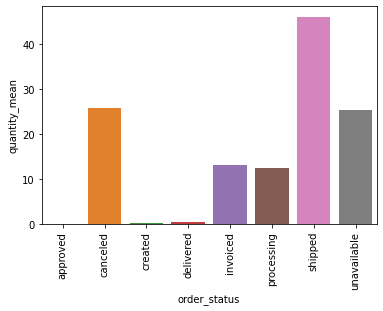

In [58]:
# Отобразим среднее на графике среднее для каждого статуса, для понимания заказы 
# с каким статусом не доставляются наиболее часто
sns.barplot(data = df_no_delivere_causes, x = 'order_status', y = 'quantity_mean')
plt.xticks(rotation = 90)

In [59]:
# Попробуем разобраться более подробно в причинах недоставленных товаров

In [60]:
# Предположим, что shipping_limit_date —  максимальная дата доставки продавцом для 
# передачи заказа партнеру по логистике, указана некорректно и она больше чем,
# order_estimated_delivery_date —  обещанная дата доставки. Для проверки этого, смержим два датафрейма
# и сравним

In [61]:
df_no_shipped = df_no_delivered.query("order_status == 'shipped'")
df_no_shipped.drop('order_delivered_customer_date_status', axis = 1, inplace = True)
df_no_shipped.drop('Year_and_month_creation', axis = 1, inplace = True)

df_no_shipped.head()

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00


In [62]:
df_no_shiped_plus_df_items = df_no_shipped.merge(df_items, on = 'order_id')
df_no_shiped_plus_df_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,1,c50ca07e9e4db9ea5011f06802c0aea0,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87
1,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00,1,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,2018-01-18 02:32:30,53.99,15.13
2,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00,1,ba4bfbf74dbe7ab37e263b9326da0523,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-17 11:45:14,36.90,26.89
3,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00,1,62bf07cdb14270c48cf42ca0312986aa,04e38a233f726ef161074ab1c9b0399a,2017-11-23 19:50:31,199.90,40.33
4,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00,1,6026308f343d15d492324e7e35ba5685,966cb4760537b1404caedd472cc610a5,2018-07-04 13:11:09,844.00,21.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaN,2017-11-24 00:00:00,1,39d4f8671e6c7b08d7d0036f4f46390f,232a6014e7b10cba61c6c2b2ea6bb4b0,2017-11-13 04:26:10,99.90,16.33
1181,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaN,2018-08-03 00:00:00,1,42ec84ace63b58b8c5a7ba7be01d5fb8,2a84855fd20af891be03bc5924d2b453,2018-07-18 12:30:58,99.90,22.00
1182,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaN,2018-07-26 00:00:00,1,101a896b1137f70a7bbb2b9fac61458d,4869f7a5dfa277a7dca6462dcf3b52b2,2018-07-11 16:35:10,265.90,14.52
1183,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24 00:00:00,1,70120d2f9b9193aa0030342072d8adec,92eb0f42c21942b6552362b9b114707d,2018-06-28 13:40:11,34.97,22.97


In [63]:
df_no_shiped_plus_df_items['out_of_date'] = df_no_shiped_plus_df_items['shipping_limit_date'] > df_no_shiped_plus_df_items['order_estimated_delivery_date']

In [64]:
df_no_shiped_plus_df_items.out_of_date.value_counts()

False    1181
True        4
Name: out_of_date, dtype: int64

In [65]:
# Предположение о том, что магазин ставит (shipping_limit_date — 
# максимальная дата доставки продавцом для передачи заказа партнеру по логистике) и она
# больше чем (order_estimated_delivery_date —  обещанная дата доставки) - Неверное.
# Однако 4 раза была допущена ошибка, дата доставки продавцом для передачи заказа партнеру 
# по логистике не может быть больше чем обещанная дата доставки.
# Попробуем разобраться в чем могла быть ещё причина.Может существует, какой - то штат/город, 
# где есть проблемы с доставкой для этого объединим датафреймы и изучим.

In [66]:
df_id_order = df_id.merge(df_order, on = 'customer_id')

In [67]:
df = df_id_order.merge(df_items, on = 'order_id')

In [68]:
# все 3 таблицы в одном датафрейме
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,False,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,False,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,False,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,False,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,False,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [69]:
df_nd = df.query("order_delivered_customer_date_status == True")
# отбираем, только те значения в которых есть пропуски по ранее введенному маркеру

In [70]:
df_nd.query("order_status== 'delivered'").shape
# проверим,сколько заказов с статусом delivered не доставлены, таких всего 8, таких образом можно
# сказать, что присутсвие времени доставки заказа принимаем окончательно за "покупку", проверим 
# есть наоборот заказ в любом статусе кроме delivered , а время доставки есть.

(8, 19)

In [71]:
df.query("order_status== 'canceled' & order_delivered_customer_date_status == False")
# Такие заказы присутсвуют только со статусом canceled, предположим это товары, которые вернули.
# Остальных соответсвий что есть время доставки, а статус отличный от delivered - нет.
# Это нам позволяет окончательно сделать вывод о том, что покупка = есть время доставки, в
# озвратами пренебрежем.

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
30695,6c57e6119369185e575b36712766b0ef,59a7bb642795ddc85534fbd5f7360334,20091,rio de janeiro,RJ,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 00:00:00,False,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 15:07:11,249.90,14.03
57306,1bccb206de9f0f25adc6871a1bcf77b2,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00,False,1,e435ceb7ced9b8446defd858630454ed,2a61c271b1ac763450d846849783e922,2018-02-23 20:56:05,29.99,14.10
65100,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,False,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23
67605,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,False,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11
86433,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,False,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51
87265,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,False,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48
87266,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,False,2,7cd29da0653abeb444703cc5a957f479,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,49.90,29.94


In [72]:
# Сгрупируем по штату, чтобы попробовать найти закономерность
df_state = df_nd.groupby(['customer_state'], as_index=False)\
                .agg({'customer_unique_id':'count'})\
                .sort_values('customer_unique_id', ascending = False)\
                .rename(columns = {'customer_unique_id':'quantity'})
                

In [73]:
df_state.head()

,customer_state,quantity
25,SP,1006
18,RJ,433
10,MG,212
4,BA,116
22,RS,102


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

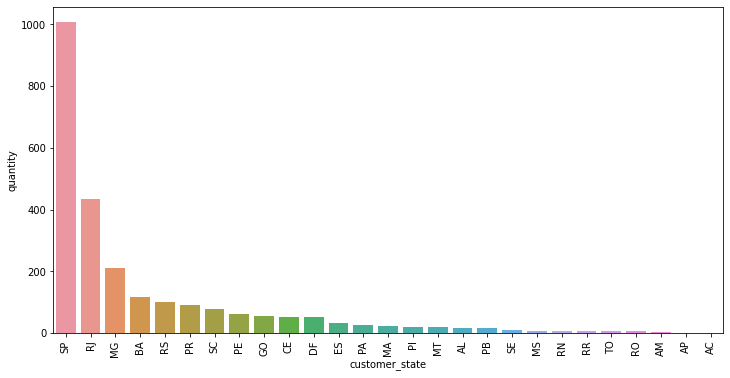

In [74]:
# Отобразим для наглядности график недоставленных заказов по штатам
plt.subplots(figsize=(12, 6))
sns.barplot(data = df_state, x = 'customer_state', y = 'quantity')
plt.xticks(rotation = 90)

In [75]:
# Сгрупируем по городу, чтобы попробовать найти закономерность
df_city = df_nd.groupby(['customer_city'], as_index=False)\
                .agg({'customer_unique_id':'count'})\
                .sort_values('customer_unique_id', ascending = False)\
                .rename(columns = {'customer_unique_id':'quantity'})
df_city

,customer_city,quantity
512,sao paulo,406
445,rio de janeiro,242
61,belo horizonte,57
455,salvador,54
78,brasilia,51
...,...,...
249,itanhandu,1
247,itambe,1
246,itamaraju,1
242,itaitinga,1


In [76]:
df_city_20 = df_city.head(20)
df_city_20.head()

,customer_city,quantity
512,sao paulo,406
445,rio de janeiro,242
61,belo horizonte,57
455,salvador,54
78,brasilia,51


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

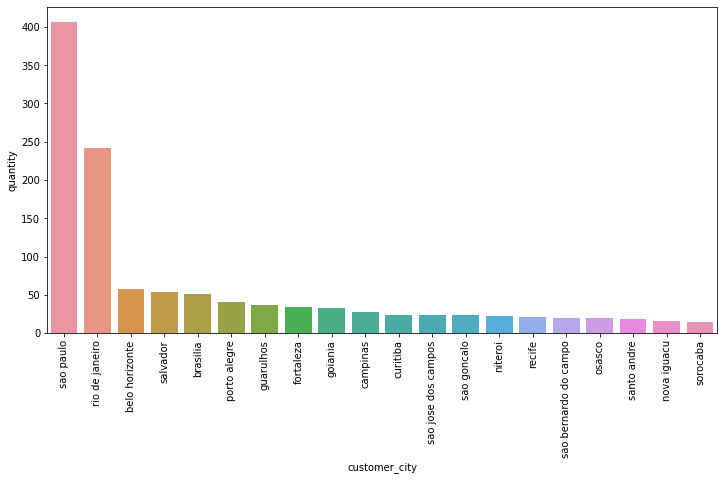

In [77]:
# Отобразим для наглядности график недоставленных заказов по городам
plt.subplots(figsize=(12, 6))
sns.barplot(data = df_city_20, x = 'customer_city', y = 'quantity')
plt.xticks(rotation = 90)

In [78]:
# Т.к. в топе городов и штатов представлены самые густонаселённые в Бразилии согласно открытым 
# источникам,разумно предположить, что при большем количестве заказов будет больше количество
# каких-то ошибок отказов, так ли это найдем процентное отношение сделанных заказов к 
# неудачным заказам


In [79]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,False,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,False,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,False,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,False,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,False,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [80]:
df_all_state = df.groupby(['customer_state'], as_index=False)\
                .agg({'customer_unique_id':'count'})\
                .sort_values('customer_unique_id', ascending = False)\
                .rename(columns = {'customer_unique_id':'quantity'})
df_all_state.head()

,customer_state,quantity
25,SP,47449
18,RJ,14579
10,MG,13129
22,RS,6235
17,PR,5740


In [81]:
df_all_city = df.groupby(['customer_city'], as_index=False)\
                .agg({'customer_unique_id':'count'})\
                .sort_values('customer_unique_id', ascending = False)\
                .rename(columns = {'customer_unique_id':'quantity'})
df_all_city.head()

,customer_city,quantity
3588,sao paulo,17808
3147,rio de janeiro,7837
452,belo horizonte,3144
557,brasilia,2392
1141,curitiba,1751


In [82]:
# Cоединим два датафрейма по штату, чтобы найти процент успеха.

In [83]:
df_big_state = df_state.merge(df_all_state, on = 'customer_state')
df_big_state.head()

,customer_state,quantity_x,quantity_y
0,SP,1006,47449
1,RJ,433,14579
2,MG,212,13129
3,BA,116,3799
4,RS,102,6235


In [84]:
df_big_state['success_rate'] = df_big_state.quantity_x/df_big_state.quantity_y
df_big_state = df_big_state.sort_values('success_rate', ascending = False)
df_big_state.head()

,customer_state,quantity_x,quantity_y,success_rate
21,RR,6,52,0.115385
16,AL,17,444,0.038288
9,CE,52,1478,0.035183
14,PI,19,542,0.035055
7,PE,60,1806,0.033223


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

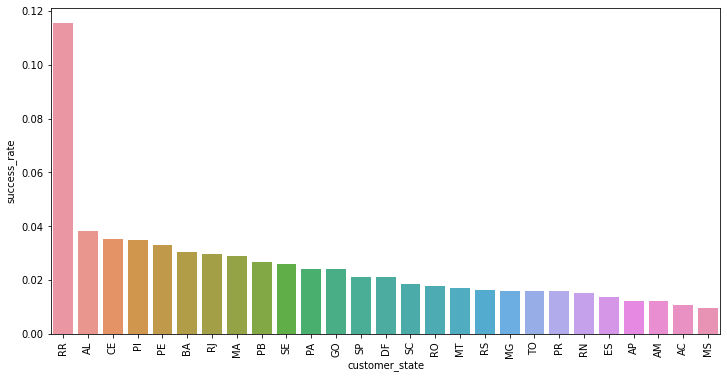

In [85]:
# Отобразим для наглядности график success_rate по штатам
plt.subplots(figsize=(12, 6))
sns.barplot(data = df_big_state, x = 'customer_state', y = 'success_rate')
plt.xticks(rotation = 90)

In [86]:
df_big_state.success_rate.describe()

count    27.000000
mean      0.025233
std       0.019786
min       0.009768
25%       0.015863
50%       0.021197
75%       0.029413
max       0.115385
Name: success_rate, dtype: float64

In [87]:
# На удивление показатель success_rate штата Сан Паулу(SP) находиться рядом с средним значением, 
# а вот штат Рорайма (RR) очень сильно выбивается от среднего.Попробуем найти город в штате SP, 
# который прославился наибольшим процентов отказа. 

In [88]:
df_RR = df_nd.query("customer_state == 'RR'")\
             .groupby(['customer_city'], as_index=False)\
             .agg({'customer_unique_id':'count'})\
             .sort_values('customer_unique_id', ascending = False)\
             .rename(columns = {'customer_unique_id':'quantity'})
df_RR

,customer_city,quantity
0,boa vista,6


In [89]:
df_RR_all = df.query("customer_state == 'RR'")\
             .groupby(['customer_city'], as_index=False)\
             .agg({'customer_unique_id':'count'})\
             .sort_values('customer_unique_id', ascending = False)\
             .rename(columns = {'customer_unique_id':'quantity'})
df_RR_all

,customer_city,quantity
0,boa vista,51
1,bonfim,1


In [90]:
# Малое количество заказов, следовательно высокий процент недоставленных заказов.

In [91]:
# Повторим все тоже самое для  городов, может и там будет какая - то аномалия Cоединим
# два датафрейма по штату, чтобы найти процент успеха.

In [92]:
df_big_city = df_city.merge(df_all_city, on = 'customer_city')
df_big_city.head()

,customer_city,quantity_x,quantity_y
0,sao paulo,406,17808
1,rio de janeiro,242,7837
2,belo horizonte,57,3144
3,salvador,54,1412
4,brasilia,51,2392


In [93]:
df_big_city['success_rate'] = df_big_city.quantity_x/df_big_city.quantity_y
df_big_city = df_big_city.sort_values('success_rate', ascending = True)
df_big_city


,customer_city,quantity_x,quantity_y,success_rate
309,volta redonda,1,251,0.003984
333,santa maria,1,232,0.004310
278,pelotas,1,208,0.004808
357,sao jose,1,198,0.005051
345,rio claro,1,184,0.005435
...,...,...,...,...
361,sao joao do itaperiu,1,1,1.000000
566,itacurussa,1,1,1.000000
354,santo antonio de goias,1,1,1.000000
274,piao,1,1,1.000000


In [94]:
df_big_city.success_rate.describe()

count    591.000000
mean       0.126837
std        0.215919
min        0.003984
25%        0.022401
50%        0.043478
75%        0.111111
max        1.000000
Name: success_rate, dtype: float64

In [95]:
# При подсчете среднего, есть значения, которые очень сильно выбиваются из- за того, что есть города
# где статистика 1 к 1 му, уберем их из выборки, отфильтровав по городам, в которых было 
# совершено хотябы 250 заказов
df_big_ciyt_kor = df_big_city.query("quantity_y >=300")
df_big_ciyt_kor.head()

,customer_city,quantity_x,quantity_y,success_rate
123,juiz de fora,3,473,0.006342
59,santos,6,820,0.007317
136,campo grande,3,360,0.008333
132,maua,3,346,0.008671
106,vitoria,4,424,0.009434


In [96]:
df_big_ciyt_kor.success_rate.describe()

count    49.000000
mean      0.022571
std       0.010457
min       0.006342
25%       0.015015
50%       0.021341
75%       0.028169
max       0.051802
Name: success_rate, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

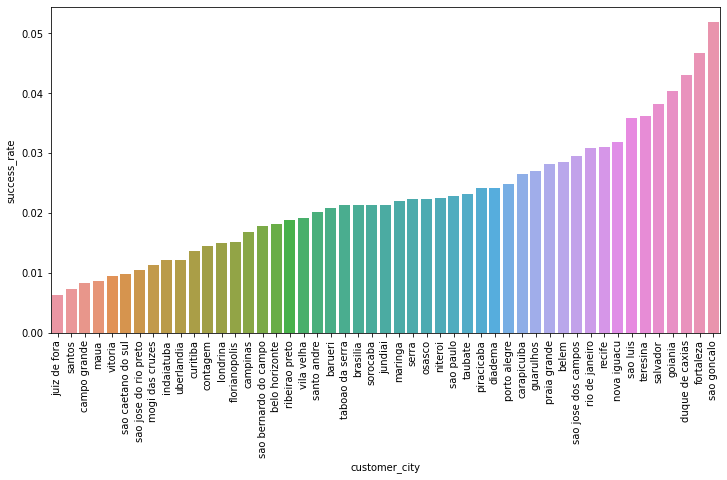

In [97]:
# Отобразим для наглядности график success_rate по штатам
plt.subplots(figsize=(12, 6))
sns.barplot(data = df_big_ciyt_kor, x = 'customer_city', y = 'success_rate')
plt.xticks(rotation = 90)

In [98]:
# Картина в с целом без ярко выраженных мин и максимумов.


In [99]:
# Попробуем разобраться со статусом shipped, почему его больше всего.

In [100]:
no_shipped = df_nd.query("order_status=='shipped'")
no_shipped.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00,True,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00,True,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00,True,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,NaN,2018-01-10 00:00:00,True,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27
254,265655cf1f2dfd4fc630004d1fe5f3cb,fc0a9229ea43fea6c9f9d79c06761a1e,13185,hortolandia,SP,44918cef2a112fc3f8e4a9b676e5ab23,shipped,2018-02-06 22:08:09,2018-02-06 22:15:42,2018-02-07 22:45:44,NaN,2018-03-12 00:00:00,True,1,d2f1978552a7604790fa5922f4345998,ac3508719a1d8f5b7614b798f70af136,2018-02-12 22:15:42,109.90,15.53


In [101]:
no_shipped.groupby(['customer_state'], as_index=False)\
                .agg({'customer_unique_id':'count'})\
                .sort_values('customer_unique_id', ascending = False)\
                .rename(columns = {'customer_unique_id':'quantity'}).head()

,customer_state,quantity
23,SP,343
17,RJ,306
3,BA,77
9,MG,75
4,CE,41


In [102]:
df_state.head()

,customer_state,quantity
25,SP,1006
18,RJ,433
10,MG,212
4,BA,116
22,RS,102


In [103]:
# количество shipped очень похожи, как и по всем статусам, не вижу смысла исследовать 
# глубже, тут не наблюдается какой-то аномалии.
# что хотелось бы проверить, это влияет ли как- то вес, 
# на доставку груза, поиследуем этот парметр, для этого разобьем на категории вес.Возможно, 
# в каких-то городах существуют ограничения по работе с весами
# (это же Бразилия, кто знает какие там правила=)) - аналогия аэропорт и макс. 
# разрешенный вес в багаж, который могут поднимать грузчки.

In [104]:
df_nd.freight_value.describe()

count    2454.000000
mean       21.866846
std        19.983270
min         0.000000
25%        13.250000
50%        16.460000
75%        22.550000
max       262.720000
Name: freight_value, dtype: float64

In [105]:
bins = [0, 50, 100, 150, 200, 250, 300]
labelss = ['0 - 50','50 - 100','100 - 150','150-200','200-250', '250-300']

In [106]:
dfcategorical = df_nd
dfcategorical.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00,True,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00,True,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00,True,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00,True,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,NaN,2018-01-10 00:00:00,True,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27


In [107]:
dfcategorical['weight_categories'] = pd.cut(dfcategorical.freight_value, bins = bins, labels = labelss)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
dfcategorical.groupby(['weight_categories'], as_index = False)\
      .agg({'customer_unique_id' :'nunique'})

,weight_categories,customer_unique_id
0,0 - 50,2048
1,50 - 100,106
2,100 - 150,22
3,150-200,3
4,200-250,1
5,250-300,3


In [109]:
# Видно, что необходимо более подробно исследовать категорию 0-50, разобьем ее на подкатегории, 
# чтобы найти закономерность

In [110]:
dfcat = df_nd
dfcat

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_categories
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00,True,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35,0 - 50
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00,True,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38,0 - 50
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00,True,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61,0 - 50
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00,True,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,0 - 50
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,NaN,2018-01-10 00:00:00,True,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27,0 - 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112430,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaN,2018-08-02 00:00:00,True,1,41db6d8062fcd38410c699743ccc0265,92eb0f42c21942b6552362b9b114707d,2018-07-30 21:22:25,13.47,7.39,0 - 50
112465,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaN,2018-05-23 00:00:00,True,1,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,2018-05-04 14:09:00,69.90,28.80,0 - 50
112473,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaN,2017-03-17 00:00:00,True,1,61509eaebb2d4bd1a7511b1a75703f8c,cca3071e3e9bb7d12640c9fbe2301306,2017-02-18 13:07:19,24.90,14.52,0 - 50
112544,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaN,2018-03-01 00:00:00,True,1,de1573cfa183a3b9ef746bc24261a497,c66dccfb3f109511246da627dd5a2498,2018-01-31 12:31:27,526.00,28.96,0 - 50


In [111]:
bins = [0, 10, 20, 30, 40, 50]
labelss = ['0 - 10','10 - 20','20 - 30','30-40','40-50']

In [112]:
dfcat['weight_cat'] = pd.cut(dfcat.freight_value, bins = bins, labels = labelss)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
df_deliver_weight = dfcat.groupby(['weight_cat'], as_index = False)\
      .agg({'customer_unique_id' :'nunique'})
df_deliver_weight

,weight_cat,customer_unique_id
0,0 - 10,282
1,10 - 20,1205
2,20 - 30,385
3,30-40,123
4,40-50,66


In [114]:
dfcat.query("weight_cat=='10 - 20'").head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_categories,weight_cat
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,...,2018-05-24 00:00:00,True,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35,0 - 50,10 - 20
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,...,2018-02-09 00:00:00,True,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61,0 - 50,10 - 20
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,...,2017-09-11 00:00:00,True,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,0 - 50,10 - 20
254,265655cf1f2dfd4fc630004d1fe5f3cb,fc0a9229ea43fea6c9f9d79c06761a1e,13185,hortolandia,SP,44918cef2a112fc3f8e4a9b676e5ab23,shipped,2018-02-06 22:08:09,2018-02-06 22:15:42,2018-02-07 22:45:44,...,2018-03-12 00:00:00,True,1,d2f1978552a7604790fa5922f4345998,ac3508719a1d8f5b7614b798f70af136,2018-02-12 22:15:42,109.90,15.53,0 - 50,10 - 20
281,3714eb406c7704a920e504085717ea5b,56d30b9f16c42d707d89967161296a04,84200,jaguariaiva,PR,fdd647b689626410b725d1cce2ddf37c,processing,2017-12-04 10:09:35,2017-12-27 14:03:00,NaN,...,2018-01-05 00:00:00,True,1,d983df6d3977955580e8585217b9ee42,48fb026ed7455a42f5d3e9390ed5088e,2018-01-03 14:03:00,30.99,15.10,0 - 50,10 - 20


In [115]:
df_deliver_weight

,weight_cat,customer_unique_id
0,0 - 10,282
1,10 - 20,1205
2,20 - 30,385
3,30-40,123
4,40-50,66


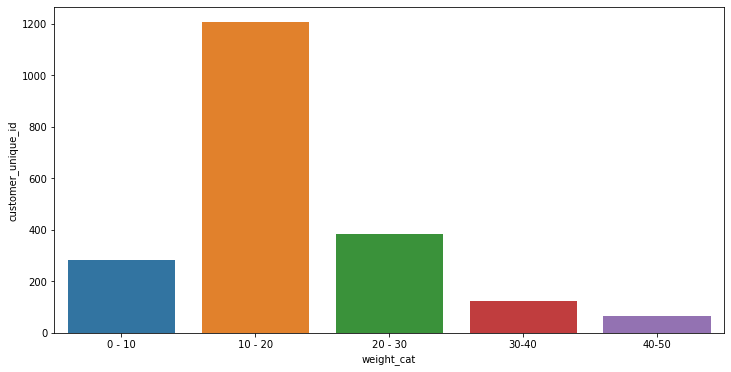

In [116]:
# Отобразим для наглядности категории веса которые хуже всего доставляют
plt.subplots(figsize=(12, 6))
sns.barplot(data = df_deliver_weight, x = 'weight_cat', y = 'customer_unique_id')

In [117]:
# Найдем процент, также как в случае с штатами и городами, для понимания, аномалия это или нет.

In [118]:
cat_al = df

In [119]:
bins = [0, 10, 20, 30, 40, 50]
labelss = ['0 - 10','10 - 20','20 - 30','30-40','40-50']

In [120]:
cat_al['weight_cat'] = pd.cut(cat_al.freight_value, bins = bins, labels = labelss)

In [121]:
cat_al_deliveres = cat_al.groupby(['weight_cat'], as_index = False)\
      .agg({'customer_unique_id' :'nunique'})
cat_al_deliveres

,weight_cat,customer_unique_id
0,0 - 10,13026
1,10 - 20,56773
2,20 - 30,16161
3,30-40,5013
4,40-50,2534


In [122]:
All_weight = df_deliver_weight.merge(cat_al_deliveres, on = 'weight_cat')
All_weight

,weight_cat,customer_unique_id_x,customer_unique_id_y
0,0 - 10,282,13026
1,10 - 20,1205,56773
2,20 - 30,385,16161
3,30-40,123,5013
4,40-50,66,2534


In [123]:
All_weight['weight_rate'] = All_weight.customer_unique_id_x/All_weight.customer_unique_id_y
All_weight

,weight_cat,customer_unique_id_x,customer_unique_id_y,weight_rate
0,0 - 10,282,13026,0.021649
1,10 - 20,1205,56773,0.021225
2,20 - 30,385,16161,0.023823
3,30-40,123,5013,0.024536
4,40-50,66,2534,0.026046


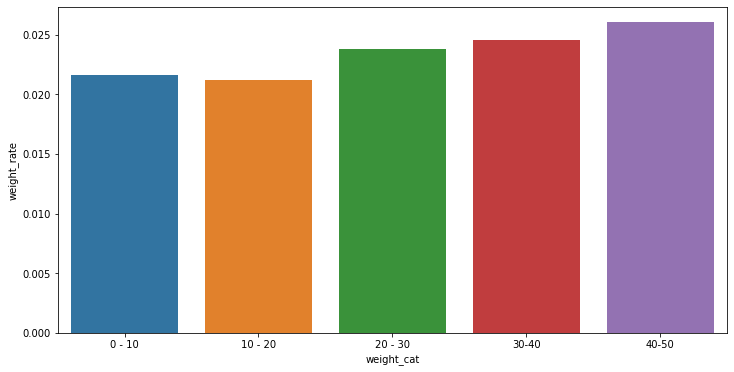

In [124]:
# Отобразим для наглядности  вес рейт
plt.subplots(figsize=(12, 6))
sns.barplot(data = All_weight, x = 'weight_cat', y = 'weight_rate')

In [125]:
# В целом тоже весьма похожие проценты доставки заказа несмотря на вес, немного растёт.
# попробуем оценить влияет ли как-то цена на доставку, возможно присутствует кража доргих посылок,
# страна с высоим уровнем преступности, попробуем оценить.

In [126]:
df_nd.price.describe()

count    2454.000000
mean      151.079295
std       233.918503
min         3.500000
25%        40.850000
50%        84.190000
75%       159.000000
max      2649.000000
Name: price, dtype: float64

In [127]:
df_cat_price = df_nd
df_cat_price.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_categories,weight_cat
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,...,2018-05-24 00:00:00,True,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35,0 - 50,10 - 20
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,...,2018-02-20 00:00:00,True,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38,0 - 50,20 - 30
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,...,2018-02-09 00:00:00,True,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61,0 - 50,10 - 20
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,...,2017-09-11 00:00:00,True,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,0 - 50,10 - 20
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,...,2018-01-10 00:00:00,True,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27,0 - 50,0 - 10


In [128]:
bins = [0, 50, 100, 150, 200, 250, 300, 3000]
labelss = ['0-50','50-100','100-150','150-200','200-250','250-300', '300-3000']

In [129]:
df_cat_price['price_cat'] = pd.cut(df_cat_price.price, bins = bins, labels = labelss)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_cat_price

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_categories,weight_cat,price_cat
50,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,...,True,1,76d58c2f53f7d340cb9fe2d8514e38ae,3092c0b297aacfb4bb6e056ebe13b9b8,2018-05-09 05:31:11,129.90,13.35,0 - 50,10 - 20,100-150
78,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,...,True,1,13c270dd3d811877114b2a225436a79a,77530e9772f57a62c906e1c21538ab82,2018-01-26 13:52:40,49.00,25.38,0 - 50,20 - 30,0-50
89,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,...,True,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-01-18 17:49:45,122.99,14.61,0 - 50,10 - 20,100-150
111,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,...,True,1,07c055536ebf10dfbb6c6db6dbfc36e5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-17 00:03:51,45.90,12.69,0 - 50,10 - 20,0-50
125,8891eb5ca0e28df961b2b5b8f3c0eb23,13ac6da47fef1b17b16f511e03b57918,2632,sao paulo,SP,ff536d93ae4214b4d51c2894ccfc569f,shipped,2017-12-21 09:01:00,2017-12-22 12:33:26,2018-01-03 18:22:09,...,True,1,53d2c16e7356d124bb2a3f64ca920754,4e922959ae960d389249c378d1c939f5,2017-12-29 12:32:10,39.00,8.27,0 - 50,0 - 10,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112430,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,...,True,1,41db6d8062fcd38410c699743ccc0265,92eb0f42c21942b6552362b9b114707d,2018-07-30 21:22:25,13.47,7.39,0 - 50,0 - 10,0-50
112465,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,...,True,1,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,2018-05-04 14:09:00,69.90,28.80,0 - 50,20 - 30,50-100
112473,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,...,True,1,61509eaebb2d4bd1a7511b1a75703f8c,cca3071e3e9bb7d12640c9fbe2301306,2017-02-18 13:07:19,24.90,14.52,0 - 50,10 - 20,0-50
112544,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,...,True,1,de1573cfa183a3b9ef746bc24261a497,c66dccfb3f109511246da627dd5a2498,2018-01-31 12:31:27,526.00,28.96,0 - 50,20 - 30,300-3000


In [131]:
df_cat_price_nd = df_cat_price.groupby(['price_cat'], as_index = False)\
      .agg({'customer_unique_id' :'nunique'})
df_cat_price_nd

,price_cat,customer_unique_id
0,0-50,651
1,50-100,587
2,100-150,356
3,150-200,191
4,200-250,87
5,250-300,86
6,300-3000,232


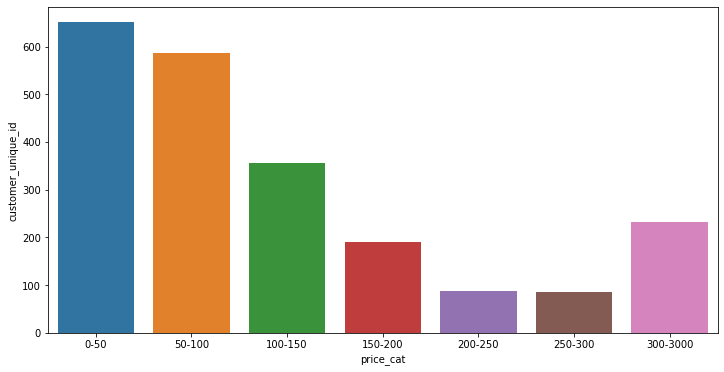

In [132]:
# Отобразим для наглядности  price рейт
plt.subplots(figsize=(12, 6))
sns.barplot(data = df_cat_price_nd, x = 'price_cat', y = 'customer_unique_id')

In [133]:
# Сделаем тоже самое для всех заказов, чтобы посмотреть процентное отношение.

In [134]:
df_cat_price_full = df

In [135]:
bins = [0, 50, 100, 150, 200, 250, 300, 3000]
labelss = ['0-50','50-100','100-150','150-200','200-250','250-300', '300-3000']

In [136]:
df_cat_price_full['price_cat'] = pd.cut(df_cat_price_full.price, bins = bins, labels = labelss)

In [137]:
df_cat_price_all = df_cat_price_full.groupby(['price_cat'], as_index = False)\
      .agg({'customer_unique_id' :'nunique'})
df_cat_price_all

,price_cat,customer_unique_id
0,0-50,32448
1,50-100,28782
2,100-150,16232
3,150-200,8283
4,200-250,3625
5,250-300,2431
6,300-3000,6579


In [138]:
All_price = df_cat_price_nd.merge(df_cat_price_all, on = 'price_cat')
All_price

,price_cat,customer_unique_id_x,customer_unique_id_y
0,0-50,651,32448
1,50-100,587,28782
2,100-150,356,16232
3,150-200,191,8283
4,200-250,87,3625
5,250-300,86,2431
6,300-3000,232,6579


In [139]:
All_price['price_cat_rate'] = All_price.customer_unique_id_x/All_price.customer_unique_id_y
All_price

,price_cat,customer_unique_id_x,customer_unique_id_y,price_cat_rate
0,0-50,651,32448,0.020063
1,50-100,587,28782,0.020395
2,100-150,356,16232,0.021932
3,150-200,191,8283,0.023059
4,200-250,87,3625,0.024000
5,250-300,86,2431,0.035376
6,300-3000,232,6579,0.035264


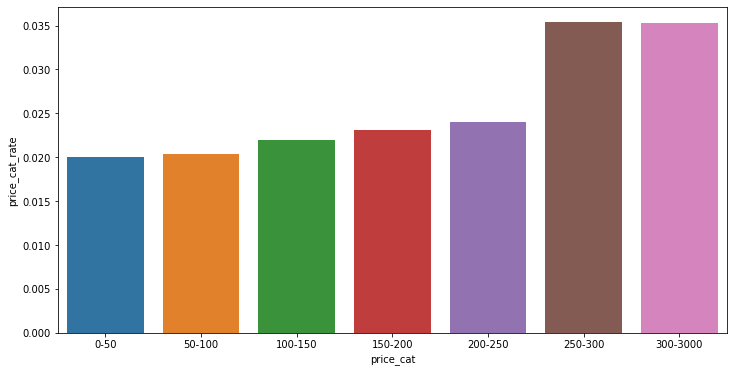

In [140]:
# Отобразим для наглядности  price рейт
plt.subplots(figsize=(12, 6))
sns.barplot(data = All_price, x = 'price_cat', y = 'price_cat_rate')

In [141]:
# Наблюдаем плавное нарастание, на промежутке цены от 0 до 250 и скачок почти в 1% после
# цены в 250, можем сделать вывод, что заказы с сумой более 250 на 1% чаще где-то пропадают
# 300-3000 расположено мало заказов, но их средний процент пропажи выше, 
# чем у заказов с наименьшей стоимостью.

In [142]:
# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)
# Покупается, для магазина значит, когда была произведена оплата и подтверждена, order_approved_at 



In [143]:
 # для дальнейшей работы приведу все даты к формату Date, чтобы было проще работать с ними.
df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)
df.order_approved_at = pd.to_datetime(df.order_approved_at)
df.order_delivered_carrier_date = pd.to_datetime(df.order_delivered_carrier_date)
df.order_delivered_customer_date = pd.to_datetime(df.order_delivered_customer_date)
df.order_estimated_delivery_date = pd.to_datetime(df.order_estimated_delivery_date)

In [144]:
df.dtypes
# проверим, что все получилось

customer_id                                     object
customer_unique_id                              object
customer_zip_code_prefix                         int64
customer_city                                   object
customer_state                                  object
order_id                                        object
order_status                                    object
order_purchase_timestamp                datetime64[ns]
order_approved_at                       datetime64[ns]
order_delivered_carrier_date            datetime64[ns]
order_delivered_customer_date           datetime64[ns]
order_estimated_delivery_date           datetime64[ns]
order_delivered_customer_date_status              bool
order_item_id                                    int64
product_id                                      object
seller_id                                       object
shipping_limit_date                             object
price                                          float64
freight_va

In [145]:
# Теперь мы можем определить какой товар покупался в какой день недели.
# есть два очень похожих названия product_id —  ид товара (аналог штрихкода) и
# order_item_id —  идентификатор товара внутри одного заказа, по моей логике они должны соответсвовать всегда, 
# уникальному товар - уникальный штрихкод, проверим, что же брать за id товара, посмотрим на датафрейм повнимательнее.

df_product = df[['product_id','order_item_id']]

In [146]:
df_product.tail(30)

,product_id,order_item_id
112620,e8316a4667e5870c85e906b1f062bde1,1
112621,e8316a4667e5870c85e906b1f062bde1,2
112622,e8316a4667e5870c85e906b1f062bde1,3
112623,e8316a4667e5870c85e906b1f062bde1,4
112624,e8316a4667e5870c85e906b1f062bde1,5
112625,e8316a4667e5870c85e906b1f062bde1,6
112626,bdc3291ab242ec1effc8eb0987850268,1
112627,bdc3291ab242ec1effc8eb0987850268,2
112628,a1250bbcaa645885c9165eab1573b5c6,1
112629,43f88c8353708451babf9bcdd1fda92a,1


In [147]:
# Проверим количество уникальных штрихкодов и уникальных индефикаторов

In [148]:
df.order_item_id.nunique()

21

In [149]:
df.product_id.nunique()
#  получается очень много уникальных товаров, проверим количество уникальных продавцов чтобы оценить насколько это реально.

32951

In [150]:
df.seller_id.nunique()

3095

In [151]:
#  3095 меньше количества уникальных товаров примерно в 10 раз, а это значит, что в среднем у каждого продавца количество
# товаров равно 10.65, что вполне реально
n = df.product_id.nunique()/df.seller_id.nunique()
n

10.646526655896608

In [152]:
# При рассмотрении датафрейма, можно сделать вывод, что order_item_id —  это просто порядковый номер товара в заказе
# а никак не уникальный индефикатор товара, как штрихкод. 
# e8316a4667e5870c85e906b1f062bde1 для товара с этим кодом соответсвует order_item_id от 1 до 6.
# Поэтому используем для подсчета product_id.

In [153]:
df.shape

(112650, 21)

In [154]:
# создаем новую колонку с днём недели предварительно убрав, где нет подтвержденных заказов.
df_3 = df.query("order_approved_at !=''")
df_3.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_cat,price_cat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,False,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,20 - 30,100-150


In [155]:
df_3['day'] = df_3['order_approved_at'].dt.day_name()
df.head(1)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_cat,price_cat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,False,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,20 - 30,100-150


In [156]:
df_3.isna().sum()
# проверяем что ничего не потеряли.

customer_id                                0
customer_unique_id                         0
customer_zip_code_prefix                   0
customer_city                              0
customer_state                             0
order_id                                   0
order_status                               0
order_purchase_timestamp                   0
order_approved_at                          0
order_delivered_carrier_date            1194
order_delivered_customer_date           2454
order_estimated_delivery_date              0
order_delivered_customer_date_status       0
order_item_id                              0
product_id                                 0
seller_id                                  0
shipping_limit_date                        0
price                                      0
freight_value                              0
weight_cat                              4988
price_cat                                 25
day                                        0
dtype: int

In [157]:
df_per_day = df_3.groupby(['day','product_id'], as_index = False)\
                 .agg({'customer_unique_id':'count'})\
                 .sort_values('day', ascending = True)

In [158]:
df_per_day

# хотелось бы от понедельника к воскресенью увидеть

,day,product_id,customer_unique_id
0,Friday,0009406fd7479715e4bef61dd91f2462,1
6041,Friday,ab169b33d13e5041b9b9d4a2fafce9d9,1
6040,Friday,ab0a97f604550b5b5b99180a6dc04461,2
6039,Friday,aafff0a607f7a35ec845b6def642057c,1
6038,Friday,aaff2ae684debfeafcf84e22e46e12d9,1
...,...,...,...
54836,Wednesday,547b95702aec86f05ac37e61d164891c,2
54837,Wednesday,5483dc3f61a1d385ccc49cec3a560617,1
54838,Wednesday,548ace38f22cc53db6f049c551d31397,1
54822,Wednesday,542d6af4881a5a647cde02c201f43916,1


In [159]:
df_per_day.day.unique()

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [160]:
df_per_day['day'] = df_per_day['day'].astype(str)

In [161]:
df_per_day.dtypes

day                   object
product_id            object
customer_unique_id     int64
dtype: object

In [162]:
# присвоить дню число, чтобы отсортировать от пн к вс

In [163]:
# Создаем словарь для задания порядка дней недели
weekday_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

In [164]:
# Присваиваем числовые значения столбцу 'day'
df_per_day['day_number'] = df_per_day['day'].map(weekday_order)


In [165]:
df_per_day.sort_values('day_number', ascending = True)

,day,product_id,customer_unique_id,day_number
15147,Monday,bbf920aa6ac72007a726e6f419156f8f,2,0
15373,Monday,c2b89f69031e68bf1a02822eea9c155b,2,0
15387,Monday,c32b7bfeed5a912b80e7e1fd8df8c95f,1,0
15374,Monday,c2bcdb759a32342591497db4153af052,1,0
15375,Monday,c2bd03501cf7f4f3a1201e6069155bc0,2,0
...,...,...,...,...
31427,Sunday,ffce5ed9e0bcc2e46796b988cdac733b,1,6
31428,Sunday,ffd34459c21034d1da6df9800de0d7a3,1,6
31429,Sunday,ffd4bf4306745865e5692f69bd237893,1,6
31337,Sunday,fc2351bcf24c714e5d21b44ad41198b7,1,6


In [166]:
df_per_day.sort_values('day_number')


,day,product_id,customer_unique_id,day_number
15147,Monday,bbf920aa6ac72007a726e6f419156f8f,2,0
15373,Monday,c2b89f69031e68bf1a02822eea9c155b,2,0
15387,Monday,c32b7bfeed5a912b80e7e1fd8df8c95f,1,0
15374,Monday,c2bcdb759a32342591497db4153af052,1,0
15375,Monday,c2bd03501cf7f4f3a1201e6069155bc0,2,0
...,...,...,...,...
31427,Sunday,ffce5ed9e0bcc2e46796b988cdac733b,1,6
31428,Sunday,ffd34459c21034d1da6df9800de0d7a3,1,6
31429,Sunday,ffd4bf4306745865e5692f69bd237893,1,6
31337,Sunday,fc2351bcf24c714e5d21b44ad41198b7,1,6


In [167]:
# Группируем данные 
df_weekday = df_per_day.groupby(['day', 'product_id']).sum().reset_index()
df_weekday

,day,product_id,customer_unique_id,day_number
0,Friday,0009406fd7479715e4bef61dd91f2462,1,4
1,Friday,000b8f95fcb9e0096488278317764d19,1,4
2,Friday,001795ec6f1b187d37335e1c4704762e,1,4
3,Friday,001b237c0e9bb435f2e54071129237e9,1,4
4,Friday,001b72dfd63e9833e8c02742adf472e3,2,4
...,...,...,...,...
61138,Wednesday,ffe0fc4e02c3559643ac063fa5cf9d07,1,2
61139,Wednesday,ffe75578163d45caa52bca3529cb511e,1,2
61140,Wednesday,ffedbd68fa6f44e788ff6c2db8094715,1,2
61141,Wednesday,fff0a542c3c62682f23305214eaeaa24,4,2


In [168]:
# Находим индексы максимального количества для каждой группы товаров
max_ind = df_weekday.groupby('product_id')['customer_unique_id'].idxmax()
max_ind

product_id
00066f42aeeb9f3007548bb9d3f33c38    25228
00088930e925c41fd95ebfe695fd2655    40783
0009406fd7479715e4bef61dd91f2462        0
000b8f95fcb9e0096488278317764d19        1
000d9be29b5207b54e86aa1b1ac54872    40784
                                    ...  
fff6177642830a9a94a0f2cba5e476d1    17370
fff81cc3158d2725c0655ab9ba0f712c    17371
fff9553ac224cec9d15d49f5a263411f    25227
fffdb2d0ec8d6a61f0a0a0db3f25b441    51682
fffe9eeff12fcbd74a2f2b007dde0c58    61142
Name: customer_unique_id, Length: 32948, dtype: int64

In [169]:
max_quantity = df_weekday.loc[max_ind]
max_quantity
max_quantity.head(5)

,day,product_id,customer_unique_id,day_number
25228,Sunday,00066f42aeeb9f3007548bb9d3f33c38,1,6
40783,Tuesday,00088930e925c41fd95ebfe695fd2655,1,1
0,Friday,0009406fd7479715e4bef61dd91f2462,1,4
1,Friday,000b8f95fcb9e0096488278317764d19,1,4
40784,Tuesday,000d9be29b5207b54e86aa1b1ac54872,1,1


In [170]:
# Проверим, что ничего не потеряли df_3 - датафрейм без групировок, у которого убрали только те заказы, в которых нет 
# времени подтверждения оплаты заказа, max_quantity_rows - датафрейм, где определено по каждому товару в какой день недели
# чаще всего покупается.

In [171]:
max_quantity.product_id.nunique()

32948

In [172]:
df_3.product_id.nunique()
#  для проверки

32948

In [173]:
# Отсортируем для наглядности от пн к вс. Но все ещё не очень информативно, с таким датафремом работать можно только зная,
# конкретный продукт ид, чтобы посмотреть день недели, когда он лучше всего продавался.
# Сгрупируем по дням недели, ивыведем по ним статистику для наглядности для всех продуктов.
max_quantity.sort_values('day_number')

,day,product_id,customer_unique_id,day_number
12352,Monday,65d5bf9ec18c2fd1bd7c9ff9b935a320,1,0
15078,Monday,b9471cbef91a12be725aa96bea7d4763,1,0
10544,Monday,2e1b5445dd65296e510e3e8c65ea7071,2,0
12784,Monday,72dd2e7b7e10b8a4083e53c7867c1564,1,0
10542,Monday,2e0e1e610098039f2eee73b65de098b4,1,0
...,...,...,...,...
26036,Sunday,20b7215f127656c56776983719ba603a,1,6
30200,Sunday,cd3835370fe681dd37af664b5f84d88e,1,6
26037,Sunday,20c3404e9bea9621d876e152794ba2d1,1,6
28137,Sunday,77b1cb0e43513cea3c9f7546cbc78cba,2,6


In [174]:
all_product_per_day = max_quantity.groupby(['day','day_number'], as_index = False)\
                                  .agg({'customer_unique_id':'sum'})\
                                  .sort_values('day_number')
all_product_per_day

,day,day_number,customer_unique_id
1,Monday,0,7379
5,Tuesday,1,12442
6,Wednesday,2,7371
4,Thursday,3,8540
0,Friday,4,9670
2,Saturday,5,6303
3,Sunday,6,3840


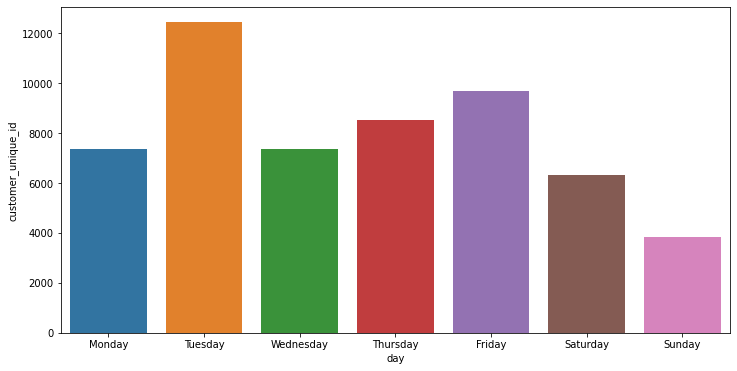

In [175]:
# Отобразим для наглядности количество покупок в неделю
# На барплоте видно распределение всех покупок по дням недели.
plt.subplots(figsize=(12, 6))
sns.barplot(data = all_product_per_day, x = 'day', y = 'customer_unique_id')

In [176]:
# Выводы 
#  Отображение по каждому товару, в какой недели, чаще всего покупается, не совсем наглядное, т.к
# существует большое количество уникальных товаров.
# Сгрупировал, по дням недели и посчитал общее количество товаров, которые покупались по дням недели.

In [ ]:
# ------------------------------------------------------------------------------------------

In [ ]:
#  Дальше можно не смотреть, первая поаытка сделать 4е задание  -
# ничем хорошим не закончилась, но если интересн код ниже верное на мой взгляд
# 4е задание в новом файле.

In [177]:
# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, 
# что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. 
# И внутри метрики это нужно учесть. (8 баллов) 

In [178]:
# Для начала соберем датафрейм, где посчитаем покупки пользователя тут не подойдет способ, как в задание 1, где можно
# было найти просто уникальных, т.к. в одной покупке, может быть несколько товаров, но это логично, считать за одну покупку.
# cгруппируем также по дате создания заказа, чтобы исключить возможность посчитать большой заказ за много маленьких.


In [262]:
# df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [259]:
# df_id.shape


(99441, 5)

In [258]:
# df_order.shape

(99441, 9)

In [252]:
# df_4 = df.query("order_delivered_customer_date_status !='False'")
# df_4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_cat,price_cat
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,False,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,20 - 30,100-150
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,False,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,40-50,250-300
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,False,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,10 - 20,100-150
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,False,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,20 - 30,100-150
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,False,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,20 - 30,200-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-25,False,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,10 - 20,50-100
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-20,False,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,10 - 20,100-150
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-05-02,False,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,10 - 20,0-50
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-12-05,False,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,20 - 30,300-3000


In [180]:
# Строчку использовал для проверки, что все что идет ниже действительно верно отфильтровал, 
# и не посчитал покупку за одну дату за несколько покупок
# df_4.query("customer_unique_id== 'ca77025e7201e3b30c44b472ff346268'") 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_delivered_customer_date_status,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_cat,price_cat
29886,dc7dc47999d1b3c4c2f6a085a1a76eef,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,9e22fb4a47d29059ef9689ca8b26d8b3,delivered,2018-02-17 01:22:20,2018-02-17 02:07:45,2018-02-19 15:48:39,...,2018-03-19,False,1,6e41ce53043104a92912099c90215f1e,4a1f694197d05fe70026b016a7316b41,2018-02-22 01:07:45,49.99,18.90,10 - 20,0-50
29887,dc7dc47999d1b3c4c2f6a085a1a76eef,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,9e22fb4a47d29059ef9689ca8b26d8b3,delivered,2018-02-17 01:22:20,2018-02-17 02:07:45,2018-02-19 15:48:39,...,2018-03-19,False,2,1fa419f430caa58899132fe77917b7b6,4a1f694197d05fe70026b016a7316b41,2018-02-22 01:07:45,56.99,18.91,10 - 20,50-100
29888,dc7dc47999d1b3c4c2f6a085a1a76eef,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,9e22fb4a47d29059ef9689ca8b26d8b3,delivered,2018-02-17 01:22:20,2018-02-17 02:07:45,2018-02-19 15:48:39,...,2018-03-19,False,3,ce497a3d92ec305f5d9ef0c4b6980a95,4a1f694197d05fe70026b016a7316b41,2018-02-22 01:07:45,49.99,18.90,10 - 20,0-50
30385,6ccedfba5919d72fcc8c51bfa982de62,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,8dacd1da7c4dc40d5c59e7ddd93b3ac8,delivered,2018-06-01 11:38:29,2018-06-02 03:31:41,2018-06-04 14:37:00,...,2018-07-18,False,1,8e0f2a25d10756a2202d5d7623e03449,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-06-11 03:31:09,74.99,19.21,10 - 20,50-100
40151,c59e684f832f832056ceee2c310cfc7f,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,f3584b023b097595c8e2b0b6fd51a839,delivered,2018-01-25 21:10:57,2018-01-25 21:18:23,2018-01-26 23:38:48,...,2018-02-26,False,1,f7b39dca4a425dcfd4a8b0b0aac4b7c0,2a7dc43cecabf23403078e2188437d1d,2018-01-31 21:18:23,59.90,18.96,10 - 20,50-100
50619,852e5ea6e9d74416ddf88bdbdb3189b9,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,cc9782f02aae34f01d12f3dbee4d5d93,delivered,2018-05-03 06:11:22,2018-05-03 06:32:14,2018-05-04 12:50:00,...,2018-06-04,False,1,d84339772d824505b7f19e647f373ec3,b2479f944e1b90cf8a5de1bbfde284d6,2018-05-09 06:31:19,10.99,37.04,30-40,0-50
50620,852e5ea6e9d74416ddf88bdbdb3189b9,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,cc9782f02aae34f01d12f3dbee4d5d93,delivered,2018-05-03 06:11:22,2018-05-03 06:32:14,2018-05-04 12:50:00,...,2018-06-04,False,2,d84339772d824505b7f19e647f373ec3,b2479f944e1b90cf8a5de1bbfde284d6,2018-05-09 06:31:19,10.99,37.04,30-40,0-50
50621,852e5ea6e9d74416ddf88bdbdb3189b9,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,cc9782f02aae34f01d12f3dbee4d5d93,delivered,2018-05-03 06:11:22,2018-05-03 06:32:14,2018-05-04 12:50:00,...,2018-06-04,False,3,d84339772d824505b7f19e647f373ec3,b2479f944e1b90cf8a5de1bbfde284d6,2018-05-09 06:31:19,10.99,37.04,30-40,0-50
50622,852e5ea6e9d74416ddf88bdbdb3189b9,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,cc9782f02aae34f01d12f3dbee4d5d93,delivered,2018-05-03 06:11:22,2018-05-03 06:32:14,2018-05-04 12:50:00,...,2018-06-04,False,4,d84339772d824505b7f19e647f373ec3,b2479f944e1b90cf8a5de1bbfde284d6,2018-05-09 06:31:19,10.99,37.04,30-40,0-50
64055,71f39c371308d132d7633895477dd307,ca77025e7201e3b30c44b472ff346268,51021,recife,PE,d07179898f582cd4b62f9f5328698baf,delivered,2018-04-26 11:44:48,2018-04-26 11:55:27,2018-05-02 14:21:00,...,2018-05-24,False,1,554bc96f8adc27819810a1aacf333535,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-05-03 11:55:27,74.99,20.57,20 - 30,50-100


In [181]:
# user_purchase_count = df_4.groupby(['customer_unique_id','order_purchase_timestamp'],as_index = False )\
#                           .agg({'product_id' :'count'})\
#                           .sort_values('product_id', ascending = False)
# user_purchase_count.head()

,customer_unique_id,order_purchase_timestamp,product_id
26657,4546caea018ad8c692964e3382debd19,2017-07-16 18:19:25,21
75431,c402f431464c72e27330a67f7b94d4fb,2018-02-22 15:30:41,20
40650,698e1cf81d01a3d389d96145f7fa6df8,2017-08-23 09:22:34,20
5921,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11-23 20:30:52,15
6964,11f97da02237a49c8e783dfda6f50e8e,2017-01-30 21:44:49,15


In [182]:
# df_all_buy = user_purchase_count.groupby(['customer_unique_id'], as_index = False)\
#                                 .count()\
#                                 .sort_values('product_id')
# df_all_buy

,customer_unique_id,order_purchase_timestamp,product_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
63177,a94c74a0431c653d53e59bcd1500e088,1,1
63176,a949b1d7d4d4f7b970cf82894da34ea1,1,1
63175,a9495a3f10b5ed1bbb124d2ac59eec8e,1,1
63174,a94762863997266a89d86350f7f20f54,1,1
...,...,...,...
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7,7
37531,6469f99c1f9dfae7733b25662e7f1782,7,7
75550,ca77025e7201e3b30c44b472ff346268,7,7
23302,3e43e6105506432c953e165fb2acf44c,9,9


In [183]:
# еще одна проверка, в дф выше, у датафрейма с этим ид 12 записей, но уникальных действительно 7
#  остальные с одинаковым временем создания заказа.
# df_all_buy.query("customer_unique_id== 'ca77025e7201e3b30c44b472ff346268'") 

,customer_unique_id,order_purchase_timestamp,product_id
75550,ca77025e7201e3b30c44b472ff346268,7,7


In [184]:
# Попробуем посчитать среднее по месяцам следующим образом:
#     Общее число покупок, разделенное на общее количество недель (в каком- то  месяце их будет не целое количество).
#     Но принимая, во внимание дату регистрации пользователя, т.к. не совсем разумно брать весь период представленных данных, 
#     тоесть от начала регистрации до - текущего дня(текущим днём примем макс дату в order_purchase_timestamp), предположив, что
#     на эту дату была выгрузка.
    

In [185]:
# today = df.order_approved_at.max()
# today

Timestamp('2018-09-03 17:40:06')

In [186]:
# Cоздадим, колонку, в которой запишем сегодняшний день, у всех он будет одинаковый.
# df_4['today'] = today

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [187]:
# # приведем колонки today и order_purchase_timestamp к началу дня, для удобства.
# series = pd.Series(df_4.order_purchase_timestamp)
# series_today = pd.Series(df_4.today)
# df_4['start_day'] = series.dt.floor('D')
# df_4['today'] = series_today.dt.floor('D')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [188]:
# df_4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weight_cat,price_cat,today,start_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,20 - 30,100-150,2018-09-03,2017-05-16
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,40-50,250-300,2018-09-03,2018-01-12
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,10 - 20,100-150,2018-09-03,2018-05-19
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,20 - 30,100-150,2018-09-03,2018-03-13
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,20 - 30,200-250,2018-09-03,2018-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,10 - 20,50-100,2018-09-03,2018-04-07
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,10 - 20,100-150,2018-09-03,2018-04-04
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,10 - 20,0-50,2018-09-03,2018-04-08
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,20 - 30,300-3000,2018-09-03,2017-11-03


In [189]:
# # сделаем новый дф с нужными нам значениями, а именно today и start_day
# df_day = df_4[['customer_unique_id','today','start_day']]
# df_day.head()

,customer_unique_id,today,start_day
0,861eff4711a542e4b93843c6dd7febb0,2018-09-03,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,2018-09-03,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,2018-09-03,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,2018-09-03,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,2018-09-03,2018-07-29


In [190]:
# # Посчитаем количество недель между датами.
# df_day['start_day'] = pd.to_datetime(df_day['start_day'])
# df_day['today'] = pd.to_datetime(df_day['today'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
# df_day['delta'] = df_day['today'] - df_day['start_day']

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
# df_day['weeks'] = df_day['delta']/ pd.Timedelta(weeks=1)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
# df_max_weeks = df_day.groupby('customer_unique_id', as_index = False)\
#                      .agg({'weeks':'max'})
# # уберем, повторы и оставим уникальных customer_unique_id с максимальным количеством weeks
# # так мы избавимся от отсчета недлель для customer_unique_id у которых больше одного заказа.

In [194]:
# Теперь необходимо сделать дф в котором, будет видно количество недель в
# каждом месяце за весь период от первого заказа до today, найдем минимальную дату заказа.

In [215]:
# start_date = df_day.start_day.min()
# start_date

Timestamp('2016-09-04 00:00:00')

In [216]:
# end_date = df_day.start_day.max()

In [217]:
# end_date

Timestamp('2018-09-03 00:00:00')

In [235]:
# # Создаем диапазон дат по месяцам
# dates = pd.date_range(start=start_date, end=end_date, freq='M')

# # Создаем список для хранения результатов
# results = []

# # Перебираем месяца
# for date in dates:
#     # Получаем первый и последний день месяца
#     first_day = date
#     last_day = date + pd.offsets.MonthEnd()
    
#     # Рассчитываем количество недель в месяце
#     weeks_count = (last_day - first_day).days / 7
    
#     # Добавляем результаты в список
#     results.append({'Month': date.strftime('%Y-%m-%d'), 'Weeks': weeks_count})

# # Создаем датафрейм из результатов
# df_month_weeks = pd.DataFrame(results)
# df_month_weeks.head()

,Month,Weeks
0,2016-09-30,4.428571
1,2016-10-31,4.285714
2,2016-11-30,4.428571
3,2016-12-31,4.428571
4,2017-01-31,4.000000


In [242]:
# df_month_weeks['Month'] = pd.to_datetime(df_month_weeks['Month'])

In [245]:
# df_month_weeks['Month'] = df_month_weeks['Month'].dt.to_period('M').dt.to_timestamp()
# df_month_weeks.head(1)

,Month,Weeks
0,2016-09-01,4.428571


In [246]:
# df_quantity = df_all_buy.rename(columns = {'order_purchase_timestamp':'quantity'})\
#                         .drop('product_id', axis = 1)
# df_quantity

,customer_unique_id,quantity
0,0000366f3b9a7992bf8c76cfdf3221e2,1
63177,a94c74a0431c653d53e59bcd1500e088,1
63176,a949b1d7d4d4f7b970cf82894da34ea1,1
63175,a9495a3f10b5ed1bbb124d2ac59eec8e,1
63174,a94762863997266a89d86350f7f20f54,1
...,...,...
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37531,6469f99c1f9dfae7733b25662e7f1782,7
75550,ca77025e7201e3b30c44b472ff346268,7
23302,3e43e6105506432c953e165fb2acf44c,9


In [201]:
# df_max_weeks

,customer_unique_id,weeks
0,0000366f3b9a7992bf8c76cfdf3221e2,16.571429
1,0000b849f77a49e4a4ce2b2a4ca5be3f,17.000000
2,0000f46a3911fa3c0805444483337064,77.428571
3,0000f6ccb0745a6a4b88665a16c9f078,46.571429
4,0004aac84e0df4da2b147fca70cf8255,41.857143
...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,64.571429
95403,fffea47cd6d3cc0a88bd621562a9d061,38.142857
95404,ffff371b4d645b6ecea244b27531430a,81.857143
95405,ffff5962728ec6157033ef9805bacc48,17.714286


In [202]:
# df_max_weeks_plus_df_quantity = df_max_weeks.merge(df_quantity, on = 'customer_unique_id')
# df_max_weeks_plus_df_quantity.head()

,customer_unique_id,weeks,quantity
0,0000366f3b9a7992bf8c76cfdf3221e2,16.571429,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,17.000000,1
2,0000f46a3911fa3c0805444483337064,77.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,46.571429,1
4,0004aac84e0df4da2b147fca70cf8255,41.857143,1


In [203]:
# # Создаем новый столбец max_delta_weeks, содержащий максимальное значение delta_weeks для каждого customer_unique_id
# df_day['max_delta_weeks'] = df_day.groupby('customer_unique_id')['delta'].transform('max')


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
# df_day

,customer_unique_id,today,start_day,delta,weeks,max_delta_weeks
0,861eff4711a542e4b93843c6dd7febb0,2018-09-03,2017-05-16,475 days,67.857143,475 days
1,290c77bc529b7ac935b93aa66c333dc3,2018-09-03,2018-01-12,234 days,33.428571,234 days
2,060e732b5b29e8181a18229c7b0b2b5e,2018-09-03,2018-05-19,107 days,15.285714,107 days
3,259dac757896d24d7702b9acbbff3f3c,2018-09-03,2018-03-13,174 days,24.857143,174 days
4,345ecd01c38d18a9036ed96c73b8d066,2018-09-03,2018-07-29,36 days,5.142857,36 days
...,...,...,...,...,...,...
112645,1a29b476fee25c95fbafc67c5ac95cf8,2018-09-03,2018-04-07,149 days,21.285714,149 days
112646,d52a67c98be1cf6a5c84435bd38d095d,2018-09-03,2018-04-04,152 days,21.714286,152 days
112647,e9f50caf99f032f0bf3c55141f019d99,2018-09-03,2018-04-08,148 days,21.142857,148 days
112648,73c2643a0a458b49f58cea58833b192e,2018-09-03,2017-11-03,304 days,43.428571,304 days


In [205]:
# # Сортируем DataFrame по столбцу delta в порядке убывания
# df_day_sorted = df_day.sort_values(by='delta', ascending=False)



In [206]:
# # Удаляем дубликаты в столбце customer_unique_id, оставляя только первое встречающееся максимальное значение delta
# df_day_filtered = df_day_sorted.drop_duplicates(subset='customer_unique_id')
# df_day_filtered.head()

,customer_unique_id,today,start_day,delta,weeks,max_delta_weeks
95931,b7d76e111c89f7ebf14761390f0f7d17,2018-09-03,2016-09-04,729 days,104.142857,729 days
79875,4854e9b3feff728c13ee5fc7d1547e92,2018-09-03,2016-09-05,728 days,104.000000,728 days
24001,830d5b7aaa3b6f1e9ad63703bec97d23,2018-09-03,2016-09-15,718 days,102.571429,718 days
102302,0eb1ee9dba87f5b36b4613a65074337c,2018-09-03,2016-10-02,701 days,100.142857,701 days
8791,61db744d2f835035a5625b59350c6b63,2018-09-03,2016-10-03,700 days,100.000000,700 days


In [207]:
#  теперь можем смержмть df_day_filtered с df_max_weeks_plus_df_quantity

In [208]:
# df_4_full = df_day_filtered.merge(df_max_weeks_plus_df_quantity, on = 'customer_unique_id')
# df_4_full

,customer_unique_id,today,start_day,delta,weeks_x,max_delta_weeks,weeks_y,quantity
0,b7d76e111c89f7ebf14761390f0f7d17,2018-09-03,2016-09-04,729 days,104.142857,729 days,104.142857,1
1,4854e9b3feff728c13ee5fc7d1547e92,2018-09-03,2016-09-05,728 days,104.000000,728 days,104.000000,1
2,830d5b7aaa3b6f1e9ad63703bec97d23,2018-09-03,2016-09-15,718 days,102.571429,718 days,102.571429,1
3,0eb1ee9dba87f5b36b4613a65074337c,2018-09-03,2016-10-02,701 days,100.142857,701 days,100.142857,1
4,61db744d2f835035a5625b59350c6b63,2018-09-03,2016-10-03,700 days,100.000000,700 days,100.000000,1
...,...,...,...,...,...,...,...,...
95402,5c58de6fb80e93396e2f35642666b693,2018-09-03,2018-08-29,5 days,0.714286,5 days,0.714286,1
95403,0c6d7218d5f3fa14514fd29865269993,2018-09-03,2018-08-29,5 days,0.714286,5 days,0.714286,1
95404,b4dcade04bc548b7e3b0243c801f8c26,2018-09-03,2018-08-29,5 days,0.714286,5 days,0.714286,1
95405,7febafa06d9d8f232a900a2937f04338,2018-09-03,2018-08-29,5 days,0.714286,5 days,0.714286,1


In [209]:
# df_4_full = df_4_full.drop('weeks_y', axis = 1)
# df_4_full.head(1)

,customer_unique_id,today,start_day,delta,weeks_x,max_delta_weeks,quantity
0,b7d76e111c89f7ebf14761390f0f7d17,2018-09-03,2016-09-04,729 days,104.142857,729 days,1


In [214]:
# # приведем колонку start_day к началу месяца и запищем результат в новую колонку Date,
# df_4_full['Date'] = df_4_full['start_day'].dt.to_period('M').dt.to_timestamp()
# df_4_full

,customer_unique_id,today,start_day,delta,weeks_x,max_delta_weeks,quantity,Date
0,b7d76e111c89f7ebf14761390f0f7d17,2018-09-03,2016-09-04,729 days,104.142857,729 days,1,2016-09-01
1,4854e9b3feff728c13ee5fc7d1547e92,2018-09-03,2016-09-05,728 days,104.000000,728 days,1,2016-09-01
2,830d5b7aaa3b6f1e9ad63703bec97d23,2018-09-03,2016-09-15,718 days,102.571429,718 days,1,2016-09-01
3,0eb1ee9dba87f5b36b4613a65074337c,2018-09-03,2016-10-02,701 days,100.142857,701 days,1,2016-10-01
4,61db744d2f835035a5625b59350c6b63,2018-09-03,2016-10-03,700 days,100.000000,700 days,1,2016-10-01
...,...,...,...,...,...,...,...,...
95402,5c58de6fb80e93396e2f35642666b693,2018-09-03,2018-08-29,5 days,0.714286,5 days,1,2018-08-01
95403,0c6d7218d5f3fa14514fd29865269993,2018-09-03,2018-08-29,5 days,0.714286,5 days,1,2018-08-01
95404,b4dcade04bc548b7e3b0243c801f8c26,2018-09-03,2018-08-29,5 days,0.714286,5 days,1,2018-08-01
95405,7febafa06d9d8f232a900a2937f04338,2018-09-03,2018-08-29,5 days,0.714286,5 days,1,2018-08-01


In [210]:
# dftest = df_4_full

In [1]:
# df_month_weeks


In [212]:
# Теперь добавим все месяцы, которые у нас есть в наблюдения и в них посчитаем среднее покупок в неделю (по месяцам),
# для тех месяцев, когда ещё клиент не был с нами будет NaN